# Tomorrow Rain Prediction in Australia 



<img src = "https://www.skymetweather.com/content/wp-content/uploads/2020/01/RaininJanuary.jpg" height=500 width=500 style="margin : auto;">

> ## About 

> 1. **Supervised classification Problem**
> 2. **Use KNeighborsClassifier Algorithm**
> 3. **Use ExtraTreesClassifier for feature Selection**
> 4. **Accuracy of model = 84%**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


> ## Import Libararies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

> ## Read Data

In [3]:
df = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


> **Translate column names in lower latter for easy to use**

In [4]:
l_columns = [x.lower() for x in df.columns]
df.columns = l_columns

> ## Handle Null Values


In [5]:
name = []
null = []
for i in df.columns:
    name.append(i)
    null.append(df[i].isnull().sum() / len(df))
    
null_desc = pd.DataFrame({"col_name" : name, "null_per": null})
null_desc.sort_values(by="null_per", ascending=False)

,col_name,null_per
6,sunshine,0.480098
5,evaporation,0.431665
18,cloud3pm,0.408071
17,cloud9am,0.384216
15,pressure9am,0.103568
16,pressure3pm,0.103314
9,winddir9am,0.072639
7,windgustdir,0.070989
8,windgustspeed,0.070555
14,humidity3pm,0.030984


> **Drop Columns which have null values more than 20%**

In [6]:
drop_col = null_desc[null_desc.null_per > 0.20].col_name.values
df.drop(drop_col, axis = 1, inplace=True)

> **Split data into two types categorical and numeric**

In [7]:
catogrical = [x for x in df.columns if df[x].dtype == "object"]
numeric = [x for x in df.columns if df[x].dtype == "float64"]

In [8]:
df[catogrical].isnull().sum()

date                0
location            0
windgustdir     10326
winddir9am      10566
winddir3pm       4228
raintoday        3261
raintomorrow     3267
dtype: int64

> **Fill Null values in categorical features with more frequent values**

In [9]:
for i in catogrical:
    df[i].fillna(df[i].mode()[0], inplace=True)

> **Fill Null values in numeric features with mean values**

In [10]:
for i in numeric:
    df[i].fillna(df[i].mean(), inplace = True)

In [11]:
df.isnull().sum()

date             0
location         0
mintemp          0
maxtemp          0
rainfall         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
dtype: int64

> ## Feature Engineering

> **Convert Date column in datetime format**

In [12]:
df["date"] = pd.to_datetime(df.date)

In [13]:
for i in catogrical:
    print("{} unique = {}".format(i, df[i].nunique()))

date unique = 3436
location unique = 49
windgustdir unique = 16
winddir9am unique = 16
winddir3pm unique = 16
raintoday unique = 2
raintomorrow unique = 2


> **More unique values are not good for accurate prediction that's why, convert date column into three new columns**

In [14]:
df["year"] = df["date"].dt.year
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month

In [15]:
df.drop(["date", "location"],axis = 1, inplace=True)

> **One Hot encoding for categorical values**

In [16]:
dummies = pd.get_dummies(df[['windgustdir','winddir9am','winddir3pm','raintoday','raintomorrow']], drop_first=True)
df1 = pd.concat([df, dummies], axis=1)
df1.drop(['windgustdir','winddir9am','winddir3pm','raintoday','raintomorrow'], axis = 1, inplace = True)

In [17]:
df1.rename(columns={"raintoday_Yes" : "raintoday", "raintomorrow_Yes" : "raintomorrow"}, inplace = True)

> **Split data**

In [18]:
X = df1.iloc[:, : -1]
y = df1.iloc[:, -1]

> **Check Feature Importance** 

In [19]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

<AxesSubplot:>

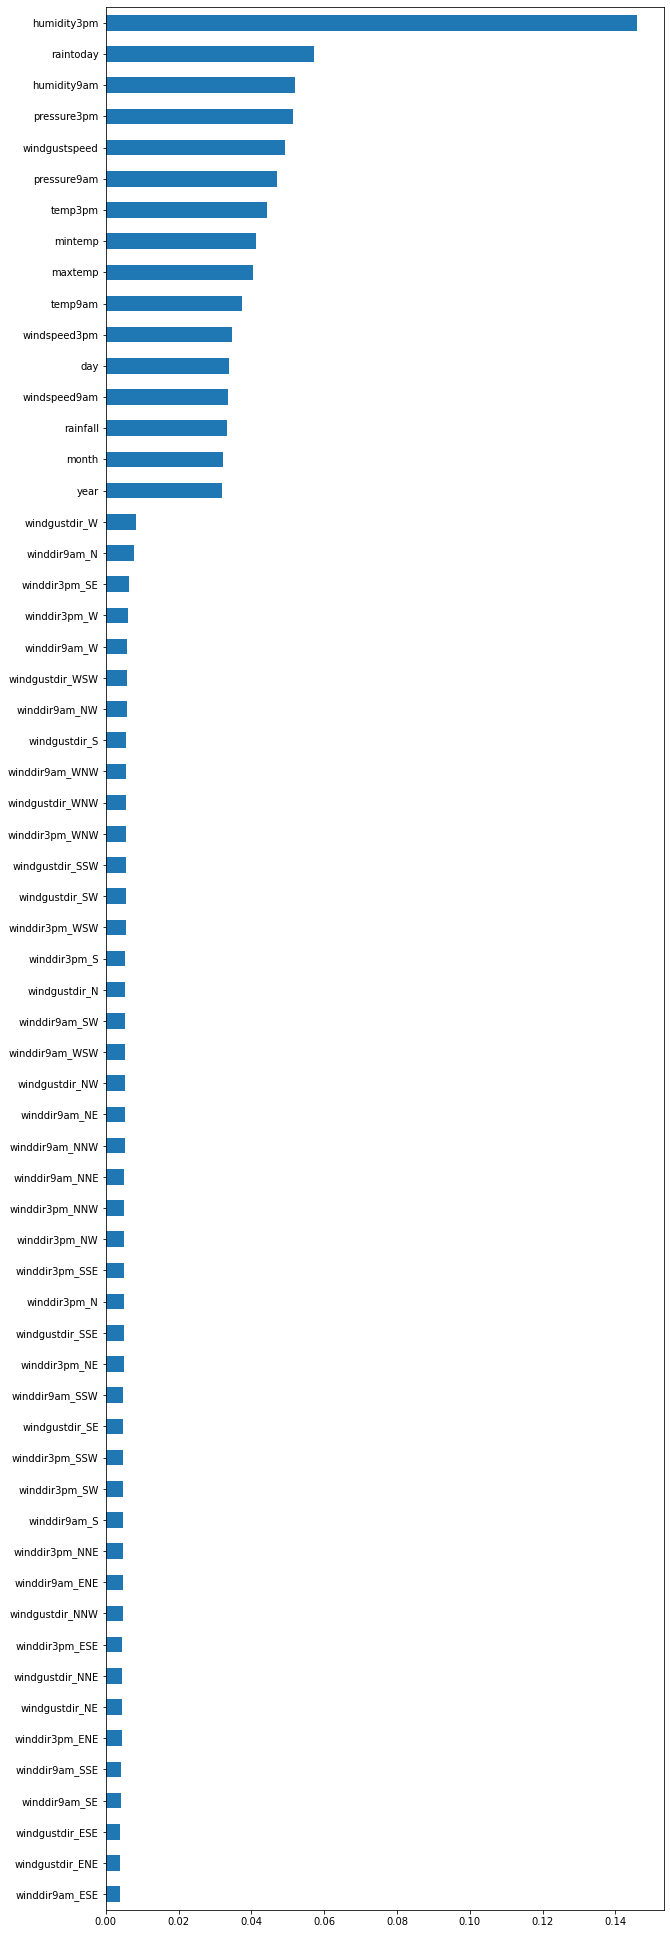

In [20]:
plt.figure(figsize=(10, 35))
feature_rank = pd.Series(model.feature_importances_, index = X.columns)
feature_rank.sort_values().plot(kind = "barh")

> **Select most 16 columns for prediction**

In [21]:
imp_columns = feature_rank.nlargest(16).index
X = df1[imp_columns]

> ## Model Building

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

> ## Check Accuracy

In [23]:
predict = knn.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predict)
acc

0.8418121820431734